프르윗 에지 검출하기

영상 불러오기

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
# 프르윗
# 소벨과 비슷한결과 가운데 계수값만 다른 커널사용
# 소벨보단 낮은 계수값을 사용하기 때문에 소벨보다 에지가 덜 강조
# 응닶시간은 소벨보다 빠르고 대각선보단 수직,수평에지에 민감
drive.mount('/content/gdrive') 
#영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/Lena-Gaussian-noise1.jpg')
#img = cv2.imread('/content/gdrive/My Drive/Image_Processing/lena.jpg')

# color영상을 gray영상으로 만들기
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


프르윗 필터(커널)  생성

In [ ]:
# 프르윗 필터
gx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]], dtype=int)
gy = np.array([[1,1,1],[0,0,0],[-1,-1,-1]], dtype=int)

# 프르윗 필터 컨벌루션
x = cv2.filter2D(gray_img, -1, gx)
y = cv2.filter2D(gray_img, -1, gy)

# uint8 타입(0~255)로 변경하고 영상 합하기
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)

output_img = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
# 따로 함수가 존재하지 않고 커널 값 설정해서 로버트 처럼 사용


#sobel
x2 = cv2.Sobel(gray_img, -1, 1, 0) # dx 1 dy 0
y2 = cv2.Sobel(gray_img, -1, 0, 1)

absX2 = cv2.convertScaleAbs(x2)
absY2 = cv2.convertScaleAbs(y2)

output_img2 = cv2.addWeighted(absX2, 0.5, absY2, 0.5 , 0)


# 로버트
gx2 = np.array([[-1, 0], [0, 1]], dtype =int)
gy2 = np.array([[0, -1], [1, 0]], dtype =int)

x3 = cv2.filter2D(gray_img, -1, gx2)
y3 = cv2.filter2D(gray_img, -1, gy2)

absX3 = cv2.convertScaleAbs(x3)
absY3 = cv2.convertScaleAbs(y3)

output_img3 = cv2.addWeighted(absX3, 0.5, absY3, 0.5 , 0)






화면 출력

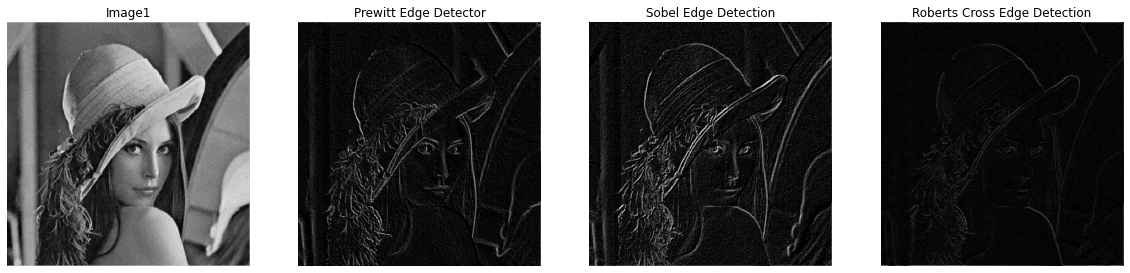

In [ ]:
#그림을 화면에 출력
plt.figure(figsize=(20,20))# 영상의 크기를 키워주자
plt.subplot(1,4,1)
plt.title("Image1")
plt.imshow(gray_img, cmap='gray')
plt.axis("off")
plt.subplot(1,4,2)
plt.title("Prewitt Edge Detector")
plt.imshow(output_img, cmap='gray')
plt.axis("off")

plt.subplot(1,4,3)
plt.title("Sobel Edge Detection")
plt.imshow(output_img2, cmap='gray')
plt.axis("off")

plt.subplot(1,4,4)
plt.title("Roberts Cross Edge Detection")
plt.imshow(output_img3, cmap='gray')
plt.axis("off")
plt.show()